## Prediction of taxi fare using the attributes

In [1]:
## importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")#importing the datasets

In [3]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [5]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

## Observation : There are no null values

In [6]:
## decoding the unique_id and if it affects the output
df['unique_id1']=df['unique_id'].str.split(':').str[0]

In [7]:
df.head(2)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,unique_id1
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,26
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,52


In [8]:
df['unique_id2']=df['unique_id'].str.split(':').str[1]
df['unique_id2']=df['unique_id2'].str.split('.').str[0]

In [9]:
df.head(2)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,unique_id1,unique_id2
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,26,21
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,52,16


In [10]:
df['unique_id1']=df['unique_id1'].astype(int)

In [11]:
df[df['unique_id1']==26]


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,unique_id1,unique_id2
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,26,21
49,26:00.0,9.0,2013-01-29 12:26:00 UTC,-73.992253,40.742657,-73.983597,40.755947,1,26,00
76,26:13.0,7.7,2010-12-04 14:26:13 UTC,-73.996601,40.736569,-73.982152,40.744322,1,26,13
87,26:00.0,7.5,2014-05-19 06:26:00 UTC,-73.990815,40.730495,-73.978337,40.751085,1,26,00
97,26:00.0,9.0,2014-12-07 12:26:00 UTC,-73.984977,40.752122,-74.000925,40.757982,1,26,00
...,...,...,...,...,...,...,...,...,...,...
49569,26:00.0,13.0,2014-04-02 07:26:00 UTC,-73.978942,40.719362,-74.001645,40.746670,6,26,00
49592,26:34.0,14.1,2011-09-26 00:26:34 UTC,-73.986775,40.742534,-73.967743,40.802079,1,26,34
49711,26:07.0,8.0,2014-09-25 23:26:07 UTC,-73.993245,40.753296,-73.983932,40.769287,1,26,07
49797,26:00.0,10.9,2009-03-11 20:26:00 UTC,-73.994265,40.745958,-73.962852,40.763208,5,26,00


## By this we can conclude that unique-id1 is the same as minute_of_pickup and unique_id2 is same as second_of_pickup

In [12]:
df.drop("unique_id",axis=1,inplace=True)
df.drop("unique_id1",axis=1,inplace=True)
df.drop("unique_id2",axis=1,inplace=True)

In [13]:
df.head(5)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## The value of lattitudes should be within -90 to 90 and longitudes within -180 to +180

In [14]:
df[df['latitude_of_pickup']<-90]
df[df['latitude_of_pickup']>90]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
5686,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1


In [15]:
df[df['latitude_of_dropoff']<-90]
df[df['latitude_of_dropoff']>90]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [16]:
df[df['longitude_of_pickup']<-180]
df[df['longitude_of_pickup']>180]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [17]:
df[df['longitude_of_dropoff']<-180]
df[df['longitude_of_dropoff']>180]

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger


In [18]:
from math import radians, cos,sin, asin,sqrt

def distance(lon1, lon2, lat1 , lat2):
    
    
    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371
    return(round (c * r, 2))
    
    
d = []
for i in range(df.shape[0]):
    d.append(distance(df["longitude_of_pickup"][i],
                      df["longitude_of_dropoff"][i],
                      df["latitude_of_pickup"][i],
                      df["latitude_of_dropoff"][i]))## To find the distance, this code is written

In [19]:
df['distance']= d

In [20]:
df = df.drop(df[df["latitude_of_pickup"] >90 ].index, axis=0)## Dropping that record

## Now since we know the distane the lattitudes and longitudes can be dropped

In [21]:
df.drop("longitude_of_pickup",axis=1,inplace=True)
df.drop("latitude_of_pickup",axis=1,inplace=True)
df.drop("longitude_of_dropoff",axis=1,inplace=True)
df.drop("latitude_of_dropoff",axis=1,inplace=True)

In [22]:
df.head(3)

,amount,date_time_of_pickup,no_of_passenger,distance
0,4.5,2009-06-15 17:26:21 UTC,1,1.03
1,16.9,2010-01-05 16:52:16 UTC,1,8.45
2,5.7,2011-08-18 00:35:00 UTC,2,1.39


## Now we have to split the date and time of pickup

In [23]:
df['date_of_pickup']=df['date_time_of_pickup'].str.split(' ').str[0]
df['time_of_pickup']=df['date_time_of_pickup'].str.split(' ').str[1]

In [24]:
df['hour_of_pickup']=df['time_of_pickup'].str.split(':').str[0]
df['minute_of_pickup']=df['time_of_pickup'].str.split(':').str[1]
df['second_of_pickup']=df['time_of_pickup'].str.split(':').str[2]

In [25]:
df['year_of_pickup']=df['date_of_pickup'].str.split('-').str[0]
df['month_of_pickup']=df['date_of_pickup'].str.split('-').str[1]
df['day_of_pickup']=df['date_of_pickup'].str.split('-').str[2]

In [26]:
df.head(2)

,amount,date_time_of_pickup,no_of_passenger,distance,date_of_pickup,time_of_pickup,hour_of_pickup,minute_of_pickup,second_of_pickup,year_of_pickup,month_of_pickup,day_of_pickup
0,4.5,2009-06-15 17:26:21 UTC,1,1.03,2009-06-15,17:26:21,17,26,21,2009,06,15
1,16.9,2010-01-05 16:52:16 UTC,1,8.45,2010-01-05,16:52:16,16,52,16,2010,01,05


In [27]:
df.drop("date_time_of_pickup",axis=1,inplace=True)
df.drop("date_of_pickup",axis=1,inplace=True)
df.drop("time_of_pickup",axis=1,inplace=True)

In [28]:
df.head(3)

,amount,no_of_passenger,distance,hour_of_pickup,minute_of_pickup,second_of_pickup,year_of_pickup,month_of_pickup,day_of_pickup
0,4.5,1,1.03,17,26,21,2009,06,15
1,16.9,1,8.45,16,52,16,2010,01,05
2,5.7,2,1.39,00,35,00,2011,08,18


## Amount , No_of_passenger and distance values cant be 0s

In [29]:
df[df['amount']<1]
df = df.drop(df[df['amount']<1].index, axis=0)

In [30]:
df[df['no_of_passenger']<1]
df = df.drop(df[df['no_of_passenger']<1].index, axis=0)

In [31]:
df = df.drop(df[df["distance"] ==0 ].index, axis=0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48279 entries, 0 to 49998
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   amount            48279 non-null  float64
 1   no_of_passenger   48279 non-null  int64  
 2   distance          48279 non-null  float64
 3   hour_of_pickup    48279 non-null  object 
 4   minute_of_pickup  48279 non-null  object 
 5   second_of_pickup  48279 non-null  object 
 6   year_of_pickup    48279 non-null  object 
 7   month_of_pickup   48279 non-null  object 
 8   day_of_pickup     48279 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.7+ MB


## To Find if there are any Outliers

In [33]:
df["no_of_passenger"].describe()

count    48279.000000
mean         1.676485
std          1.290743
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [34]:
df["amount"].describe()

count    48279.000000
mean        11.337904
std          9.434530
min          2.500000
25%          6.000000
50%          8.500000
75%         12.500000
max        165.000000
Name: amount, dtype: float64

In [35]:
df = df.drop(df[df["amount"] >100 ].index, axis=0)

## Converting all fields to integer

In [36]:
df['day_of_pickup']=df['day_of_pickup'].astype(int)
df['hour_of_pickup']=df['hour_of_pickup'].astype(int)
df['minute_of_pickup']=df['minute_of_pickup'].astype(int)
df['second_of_pickup']=df['second_of_pickup'].astype(int)
df['amount']=df['amount'].astype(int)

In [37]:
df['month_of_pickup']=df['month_of_pickup'].astype(int)

In [38]:
df['distance'].describe()

count    48270.000000
mean        18.261534
std        351.004839
min          0.010000
25%          1.290000
50%          2.200000
75%          4.000000
max       8667.820000
Name: distance, dtype: float64

In [39]:
df['amount'].describe()

count    48270.000000
mean        10.919474
std          9.290140
min          2.000000
25%          6.000000
50%          8.000000
75%         12.000000
max        100.000000
Name: amount, dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48270 entries, 0 to 49998
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   amount            48270 non-null  int32  
 1   no_of_passenger   48270 non-null  int64  
 2   distance          48270 non-null  float64
 3   hour_of_pickup    48270 non-null  int32  
 4   minute_of_pickup  48270 non-null  int32  
 5   second_of_pickup  48270 non-null  int32  
 6   year_of_pickup    48270 non-null  object 
 7   month_of_pickup   48270 non-null  int32  
 8   day_of_pickup     48270 non-null  int32  
dtypes: float64(1), int32(6), int64(1), object(1)
memory usage: 2.6+ MB


In [41]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['year_of_pickup']= label_encoder.fit_transform(df['year_of_pickup'])

df['year_of_pickup'].unique()
df['year_of_pickup']=df['year_of_pickup'].astype(int)
df.head()

,amount,no_of_passenger,distance,hour_of_pickup,minute_of_pickup,second_of_pickup,year_of_pickup,month_of_pickup,day_of_pickup
0,4,1,1.03,17,26,21,0,6,15
1,16,1,8.45,16,52,16,1,1,5
2,5,2,1.39,0,35,0,2,8,18
3,7,1,2.80,4,30,42,3,4,21
4,5,1,2.00,7,51,0,1,3,9


## Data Visualisation

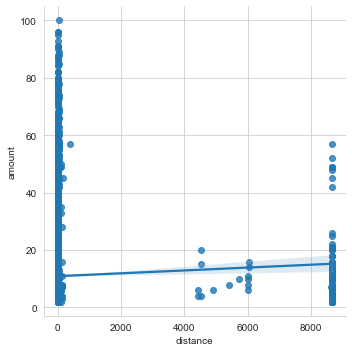

In [42]:
sns.set_style('whitegrid')
sns.lmplot(x ='distance', y ='amount', data = df,  markers =['o'])

In [43]:
df = df.drop(df[df["distance"] >50].index, axis=0)

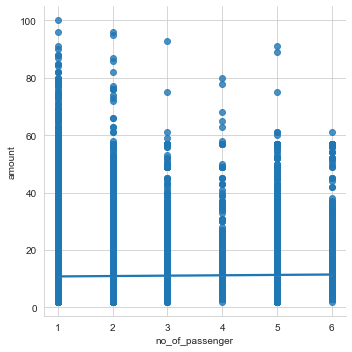

In [44]:
sns.set_style('whitegrid')
sns.lmplot(x ='no_of_passenger', y ='amount', data = df,  markers =['o'])

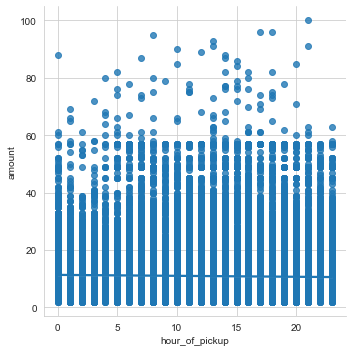

In [45]:
sns.set_style('whitegrid')
sns.lmplot(x ='hour_of_pickup', y ='amount', data = df,  markers =['o'])

In [46]:
df = df.drop(df[df["amount"] >80].index, axis=0)

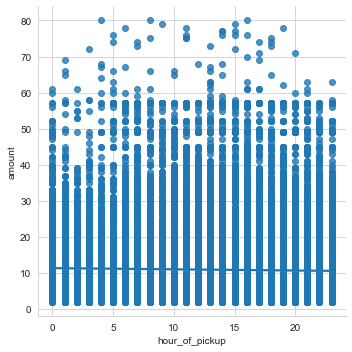

In [47]:
sns.set_style('whitegrid')
sns.lmplot(x ='hour_of_pickup', y ='amount', data = df,  markers =['o'])

In [48]:
X=df.iloc[:,1:9]
X

,no_of_passenger,distance,hour_of_pickup,minute_of_pickup,second_of_pickup,year_of_pickup,month_of_pickup,day_of_pickup
0,1,1.03,17,26,21,0,6,15
1,1,8.45,16,52,16,1,1,5
2,2,1.39,0,35,0,2,8,18
3,1,2.80,4,30,42,3,4,21
4,1,2.00,7,51,0,1,3,9
...,...,...,...,...,...,...,...,...
49994,1,2.29,19,57,0,3,10,13
49995,1,4.94,23,25,15,4,6,12
49996,1,0.87,17,19,18,6,6,22
49997,1,2.26,4,53,0,2,1,30


In [49]:
y=df.iloc[:,0:1]
y

,amount
0,4
1,16
2,5
3,7
4,5
...,...
49994,8
49995,15
49996,7
49997,6


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33)

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## Linear Regrssion

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linreg = LinearRegression(fit_intercept= True, normalize =True)
linreg.fit(X_train , y_train)
LinearRegression(normalize=True)
y_pred = linreg.predict(X_test)

C:\Users\anish\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [53]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)*100

82.18403709640155

## Random Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators = 15)
rfreg.fit(X_train,y_train)


C:\Users\anish\AppData\Local\Temp\ipykernel_18812\2411780474.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train,y_train)


RandomForestRegressor(n_estimators=15)

In [55]:
predict = rfreg.predict(X_test)


In [56]:
r2_score(y_test, predict)*100

82.42589602219994

## XGBoost Regression

In [57]:
!pip install xgboost

In [58]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb_r.fit(X_train,y_train)
 
# Predict the model
pred = xgb_r.predict(X_test)
 

[14:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [59]:
r2_score(y_test, pred)*100

84.16066571715423

## SVM Regression

In [60]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\Users\anish\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [61]:
y_pred2 = regressor.predict(X_test)


In [62]:
r2_score(y_test,y_pred2)*100

82.91439682433901

## ANN Regression

In [63]:
!pip install tensorflow-gpu

In [64]:
import tensorflow as tf
print(tf.__version__)


2.9.1


In [65]:
from tensorflow.keras.models import Sequential #Helps to create Forward and backward propogation
from tensorflow.keras.layers import Dense #Helps to create neurons in ANN
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU #activation functions
from tensorflow.keras.layers import Dropout #Regularization Parameters

In [66]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 35)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
2161/2161 [============================

In [67]:
predict=NN_model.predict(X_test)

497/497 [==============================] - 1s 1ms/step


In [68]:
r2_score(y_test,predict)*100

83.80888564171082